# This notebook will try to load simple litter survey data sample and try to train using it

In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12287MiB)
Setup complete ✅ (8 CPUs, 7.7 GB RAM, 126.5/1006.9 GB disk)


In [2]:
!ls /app

CITATION.cff	 docker		     litter_survey_dataset  train_dataset
CONTRIBUTING.md  dockerfile	     mkdocs.yml		    ultralytics
LICENSE		 docs		     pyproject.toml
README.md	 examples	     requirements.txt
README.zh-CN.md  lin_toturial.ipynb  tests


In [3]:
!ls /app/examples  

README.md		       YOLOv8-OpenVINO-CPP-Inference
RTDETR-ONNXRuntime-Python      YOLOv8-Region-Counter
YOLO-Series-ONNXRuntime-Rust   YOLOv8-SAHI-Inference-Video
YOLOv8-Action-Recognition      YOLOv8-Segmentation-ONNXRuntime-Python
YOLOv8-CPP-Inference	       YOLOv8-TFLite-Python
YOLOv8-LibTorch-CPP-Inference  heatmaps.ipynb
YOLOv8-ONNXRuntime	       hub.ipynb
YOLOv8-ONNXRuntime-CPP	       object_counting.ipynb
YOLOv8-ONNXRuntime-Rust        object_tracking.ipynb
YOLOv8-OpenCV-ONNX-Python      tutorial.ipynb


### Check if you have GPU enabled

In [4]:
!python3 -c "import torch; print(torch.cuda.is_available())"

True


### Check if your docker container has all the necessary lib

In [5]:
import torch

In [6]:
import ultralytics

In [7]:
import cv2

In [8]:
print('Importing worked! You are all set!')

Importing worked! You are all set!


# Now try to load some image and run prediction

In [9]:
import cv2

def extract_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frame_rate = 30  # Assuming 30 fps
    count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if count % frame_rate == 0:
            yield frame
        count += 1
    cap.release()

In [10]:
image_path = 'litter_survey_dataset/2024-07-21/RayBan/photo-21700_singular_display_fullPicture.jpeg'

(4032, 3024, 3)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 23.6MB/s]



0: 640x480 1 umbrella, 109.1ms
Speed: 9.1ms preprocess, 109.1ms inference, 9.4ms postprocess per image at shape (1, 3, 640, 480)
1131 2 3016 364
available class id and label: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair'

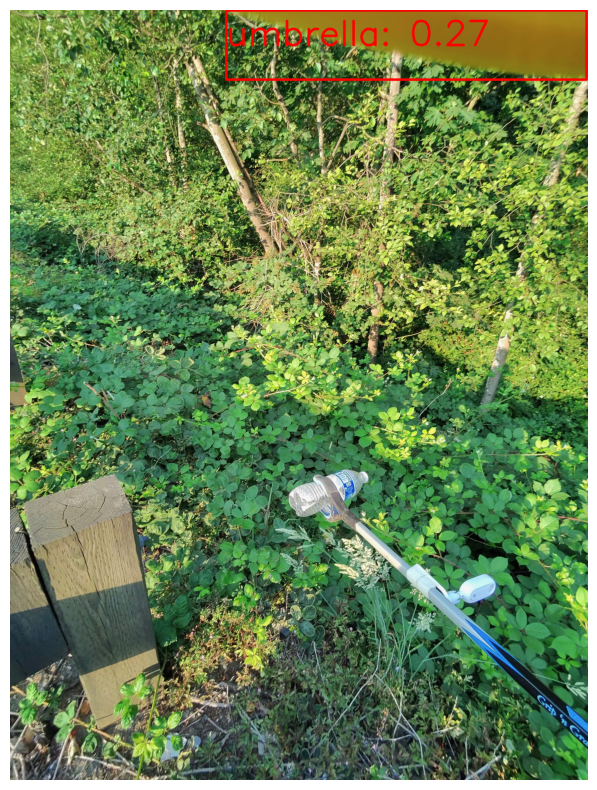

In [11]:
from ultralytics import YOLO
from ultralytics.solutions import object_counter
import cv2
import matplotlib.pyplot as plt


def run_inference(image_path):
    # Read the input image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
    
    print(image.shape)
    model = YOLO("yolo11n.pt")
    # Run inference on the image
    results = model(image)
    
    # Loop through the results and draw bounding boxes
    for result in results:
        for box in result.boxes:
            # Get the bounding box coordinates
            x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
            print(f"{x1} {y1} {x2} {y2}")
            
            # Draw the bounding box on the image
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 12)  # Red color in RGB
            label_position_x = round(x1)
            label_position_y = round((y1+y2)/2)
            # Get the class label and confidence score
            label = result.names[int(box.cls[0].cpu().numpy())]
            print(f"available class id and label: {result.names}\npredicted class id:")
            print(box.cls[0].cpu().numpy())
            
            confidence = float(box.conf[0].cpu().numpy())
            print(f"confidence {confidence}")
            
            # Draw the label and confidence score on the image with increased text size
            font_scale = 6  # Increased from 0.5 to 5 for 10x larger text
            thickness = 12  # Increased thickness for better visibility at larger scale
            cv2.putText(image_rgb, f"{label}: {confidence:.2f}", (label_position_x, label_position_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 0, 0), thickness, cv2.LINE_AA)
    
    # Display the image with bounding boxes using Matplotlib
    plt.figure(figsize=(10,10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()



# Run the inference
run_inference(image_path)

### The same can be done via cli

In [12]:
!yolo predict model=yolo11n.pt source='litter_survey_dataset/2024-07-21/RayBan/photo-21700_singular_display_fullPicture.jpeg'

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12287MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 /ultralytics/litter_survey_dataset/2024-07-21/RayBan/photo-21700_singular_display_fullPicture.jpeg: 640x480 1 umbrella, 94.8ms
Speed: 6.4ms preprocess, 94.8ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /ultralytics/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


# Model Training 
### Refer to https://docs.ultralytics.com/modes/train/#tensorboard

In [13]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="coco8.yaml", epochs=3, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.58 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12287MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=coco8.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 433k/433k [00:00<00:00, 12.5MB/s]
Unzipping /datasets/coco8.zip to /datasets/coco8...: 100%|██████████| 25/25 [00:00<00:00, 4339.05file/s]

Dataset download success ✅ (0.9s), saved to /datasets



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 755k/755k [00:00<00:00, 12.8MB/s]


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

YOLO11n summary: 319 layers, 2,624,080 parameters, 2,624,064 gradients, 6.6 GFLOPs

Transferred 499/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /datasets/coco8/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 540.09it/s]

train: New cache created: /datasets/coco8/labels/train.cache



val: Scanning /datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 598.59it/s]

val: New cache created: /datasets/coco8/labels/val.cache


Plotting labels to /ultralytics/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /ultralytics/runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      0.78G      1.092       2.75      1.488         21        640: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]

                   all          4         17      0.568       0.85      0.878      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3     0.849G      1.186      2.796      1.488         36        640: 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.85it/s]

                   all          4         17      0.557       0.85      0.886      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3     0.797G      1.096      2.508      1.219         20        640: 100%|██████████| 1/1 [00:00<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.95it/s]

                   all          4         17      0.559       0.85      0.851      0.615



3 epochs completed in 0.001 hours.
Optimizer stripped from /ultralytics/runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from /ultralytics/runs/detect/train/weights/best.pt, 5.5MB

Validating /ultralytics/runs/detect/train/weights/best.pt...
Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12287MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.81it/s]


                   all          4         17      0.558       0.85      0.886      0.635
                person          3         10      0.548        0.6      0.592      0.265
                   dog          1          1      0.541          1      0.995      0.697
                 horse          1          2        0.5          1      0.995      0.674
              elephant          1          2      0.358        0.5      0.745      0.281
              umbrella          1          1      0.563          1      0.995      0.995
          potted plant          1          1       0.84          1      0.995      0.895
Speed: 0.4ms preprocess, 4.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to /ultralytics/runs/detect/train


In [14]:
print('Training success!')

Training success!


### Now try to train using litter survey data

In [43]:
# First prepare the labels to normalize them  

import os 
import json 

def crop_image_gen_label(img_dir: str, img_file: str, img_height: int, img_width: int, output_size: int = 640, save_bbx: bool = False):
    print(f"{img_height=} by {img_width=}")
    if 'resized' in img_file:
        return 
    json_file = img_file.split('.')[0] + '.json' 
    x1,y1 = 0,0
    x2,y2 = 0,0 
    with open(f'{img_dir}/{json_file}', 'r') as json_file_content:
        json_data = json.load(json_file_content)
        shapes = json_data['shapes']
        for s in shapes:
            if s['label'] == 'Grabber':
                x1,y1 = s['points'][0] 
                x2,y2 = s['points'][1]
                break 
    if x1+y1+x2+y2 == 0:
        raise Exception("No label found for Grabber!")
    else:
        print(f'found Grabber label {x1, y1} {x2, y2}')

    img = cv2.imread(f'{img_dir}/{img_file}')

    if img_height > img_width:
        # y needs to be cropped 
        crop_y = int(abs(img_height-img_width) / 2)
        new_height = img_height - crop_y 
        print(f'{crop_y} {new_height}')
        cropped_img = img[crop_y : new_height, 0:img_width] 
        
        # adjust bounding boxes for Grabber 
        y1 = max( y1 - crop_y, 0) 
        y2 = y2 - crop_y
    else:
        # x need to be cropped 
        avg_x = (x1 + x2) /2 
        crop_x = int(abs(img_width - img_height) / 2)
        print(f'{crop_x}')
        cropped_img = img[0:img_height, 0 + crop_x :img_width - crop_x] 

        # adjust bounding boxes for Grabber 
        x1 = min(x1 - crop_x, 0) 
        x2 = x2 - crop_x 

    resized_img = cv2.resize(cropped_img, (output_size, output_size), interpolation=cv2.INTER_LINEAR)
    # new bounding box 
    center_x = (x1+x2)/2 * output_size / min(img_height, img_width) 
    center_y = (y1+y2)/2 * output_size / min(img_height, img_width) 
    box_width = abs(x2-x1) * output_size / min(img_height, img_width) 
    box_height = abs(y2-y1) * output_size / min(img_height, img_width) 

    top_left_x = int(center_x - box_width / 2)
    top_left_y = int(center_y - box_height / 2)
    bottom_right_x = int(center_x + box_width / 2)
    bottom_right_y = int(center_y + box_height / 2)

    print(f'resized bbx {x1, y1} {x2, y2}')
    if save_bbx:
        cv2.rectangle(resized_img, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 255, 0), 2)
    cropped_img = img_file.split('.')[0] + '_resized.' + img_file.split('.')[1]
    print(cropped_img)
    cv2.imwrite(f'{img_dir}/{cropped_img}', resized_img)

    label_txt = cropped_img.split('.')[0] + '.txt' 
    with open(f'{img_dir}/{label_txt}', 'w') as txt_file:
        txt_file.write(f'0 {center_x/output_size} {center_y/output_size} {box_width/output_size} {box_height/output_size}')
        print(f'generated normalized: {label_txt} ')

photo-19704_singular_display_fullPicture.json
img_height=3491 by img_width=2618
generated: photo-19704_singular_display_fullPicture.txt 
photo-19639_singular_display_fullPicture.json
img_height=3650 by img_width=2737
generated: photo-19639_singular_display_fullPicture.txt 
mcp_photo-19652_singular_display_fullPicture.json
img_height=4032 by img_width=3024
generated: mcp_photo-19652_singular_display_fullPicture.txt 
photo-1007_singular_display_fullPicture.json
img_height=4032 by img_width=3024
generated: photo-1007_singular_display_fullPicture.txt 
photo-3371_singular_display_fullPicture.json
img_height=4032 by img_width=3024
generated: photo-3371_singular_display_fullPicture.txt 
mcp_photo-19511_singular_display_fullPicture.json
img_height=4032 by img_width=3024
generated: mcp_photo-19511_singular_display_fullPicture.txt 


In [ ]:
import os 
import cv2 

img_ct = 0 
img_dir = 'litter_survey_dataset/SampleImageToAnnotate'
all_labeled_images = os.listdir(img_dir)
rejected_imgs = ['photo-9994_singular_display_fullPicture.jpeg', 'photo-20117_singular_display_fullPicture.jpeg','photo-3413_singular_display_fullPicture.jpeg']
for img_file in all_labeled_images:
    if img_file.endswith('.jpeg'):
        img_ct += 1 
        print(img_file)
        print(img_ct)
        img_content = cv2.imread(f'{img_dir}/{img_file}')
        img_height, img_width = img_content.shape[:2]
        print(f'{ img_height, img_width}')
        if img_file not in rejected_imgs:
            crop_image_gen_label(img_dir=img_dir,img_file=img_file,img_height=img_height,img_width=img_width)

In [ ]:
import os
import shutil


def copy_to_train_dataset(img_dir: str, img_file: str, label_type: str, label_dir: str = '/app/train_dataset'):
    
    source_img = f"{img_dir}/{img_file}"
    destination_img = f"{label_dir}/images/{label_type}/{img_file}"

    label_file = img_file.split('.')[0] + '.txt' 
    source_label = f"{img_dir}/{label_file}"
    destination_label = f"{label_dir}/labels/{label_type}/{label_file}"
    
    # Copy the file
    shutil.copy(source_img, destination_img)
    print(f'copied to {destination_img}') 
    shutil.copy(source_label, destination_label)
    print(f'copied to {destination_label}') 

In [ ]:
for img_file in all_labeled_images:
    if 'resized' in img_file and not img_file.endswith('.txt'):
        print(img_file)
        if len(img_file) % 2 == 0 :
            print('val')
            copy_to_train_dataset(img_dir=img_dir,img_file=img_file, label_type = 'val')
        else:
            print('train')
            copy_to_train_dataset(img_dir=img_dir,img_file=img_file, label_type = 'train')

In [ ]:

# Specify the dataset directory
dataset_dir = "/app/train_dataset/labels"

# Define cache files to remove
train_cache = os.path.join(dataset_dir, 'train.cache')
val_cache = os.path.join(dataset_dir, 'val.cache')

# Remove cache files if they exist
for cache_file in [train_cache, val_cache]:
    if os.path.exists(cache_file):
        os.remove(cache_file)
        print(f"Removed cache file: {cache_file}")
    else:
        print(f"Cache file does not exist: {cache_file}")

In [2]:
from ultralytics import YOLO

model = YOLO('yolo11n.pt')
data_yaml = '/app/train_dataset/train_dataset.yaml'
print(f"Loading dataset: {data_yaml}")

Loading dataset: /app/train_dataset/train_dataset.yaml


In [3]:
import torch
print(torch.__version__)

2.0.1+cu117


In [7]:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

In [5]:
import torch
print(torch.__version__)

2.0.1+cu117


In [9]:

# model.train(data=data_yaml, epochs=1, imgsz=640, batch=1, device='cpu', augment=True)

In [ ]:
print('training success!')